# Сборный проект

# Этапы исследования:



1. Откройте файл с данными и изучите общую информацию
Путь к файлу:

/datasets/games.csv


2. Предобработка данных:

    2.1 Приведите данные к нужным типам:

    2.2 Опишите, в каких столбцах пришлось заменить тип данных и почему
    Обработайте пропуски при необходимости:

    2.3 Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
    Опишите возможные причины возникновения пропусков



3. Проведите исследовательский анализ данных

    3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 
    3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
    
        3.2.1 За какой характерный срок появляются новые и исчезают старые платформы?

    3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

    3.4 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

    3.5 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

    3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

        3.6.1 Соотнесите выводы с продажами игр на других платформах.

    3.7 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

    
    

4. Составьте портрет пользователя для каждого региона

    4.1 Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
    
    4.2 Самые популярные платформы (топ-5). Опишите различия в долях продаж.

    4.3 Самые популярные жанры (топ-5). Поясните разницу.

    4.4 Влияет ли рейтинг ESRB на продажи в отдельном регионе?


5. Проверьте гипотезы

    5.1 Средний пользовательский рейтинг платформ XOne и PC одинаковый;

    5.3 Средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:

Как вы формулировали нулевую и альтернативную гипотезы
какой критерий использовали для проверки гипотез и почему


6. Напишите общий вывод

Общие выводы

Рекомендации

# Задачи исследования:

Определить факторы влияющие на успешность игры.

In [203]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

data = pd.read_csv("/datasets/games.csv")
display(data)
data.info()
print(data["Rating"].value_counts())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64


# Описание данных:

Name — название игры


Platform — платформа


Year_of_Release — год выпуска


Genre — жанр игры


NA_sales — продажи в Северной Америке (миллионы проданных копий)


EU_sales — продажи в Европе (миллионы проданных копий)


JP_sales — продажи в Японии (миллионы проданных копий)


Other_sales — продажи в других странах (миллионы проданных копий)


Critic_Score — оценка критиков (максимум 100)


User_Score — оценка пользователей (максимум 10)


Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Описание рейтинга:**

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")


«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.


«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.


«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».


K-A тоже самое, что и E.


«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.


«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.

# Предобработка данных

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1.9       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64
tbd    2424
7.8     324
8       

0      2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.2       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

0.0    2425
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
2.3       2
0.9       2
0.7       2
9.6       2
9.7       1
Name: user_score, Length: 95, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.3      2
0.2      2
1.1      2
0.6      2
9.7      1
Name: user_score, Length: 94, dtype: int64


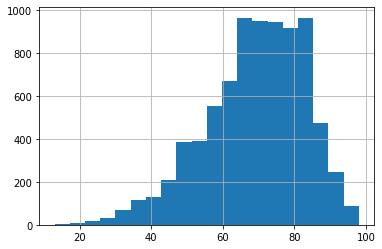

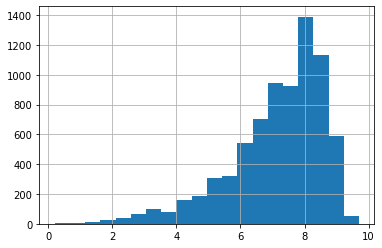

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [204]:
data.columns = data.columns.str.lower()
display(data)
#Не меняю тип данных на datetime, потому что у plotly.express потом во время построения анимированного графика будут проблемы с этим.
#data["year_of_release"] = pd.to_datetime(data["year_of_release"], format = "%Y")
display(data)
print(data["user_score"].value_counts())
#Избавляемся от пропусков
for i in ["name","genre"]:
    data[i] = data[i].dropna()
data.info()

#Заменяем, поскольку это одно и тоже.
data["rating"] = data["rating"].replace("K-A", "E")

#Функция, которая заменяет пропущенное значение средним по категории в нужном столбце.
def fillbygroup(Data, row):
    genre_unique = Data["genre"].unique()
    for type in genre_unique:
        Data.loc[Data["genre"] == type, row] = Data.loc[Data["genre"] == type, row].fillna(Data[Data["genre"] == type][row].mean())
    return Data

print(data["critic_score"].value_counts())
print(data["user_score"].value_counts())

#data = fillbygroup(data, "critic_score")
data.info()
print(data["critic_score"].value_counts())

#Изменим значение "tbd" на 0, хотя можно было сразу удалить.
data["user_score"] = data["user_score"].replace("tbd", 0)
display(data["user_score"].value_counts())
data["user_score"] = data["user_score"].astype("float64")
#data = fillbygroup(data, "user_score")
print(data["user_score"].value_counts())
data.info()

#Избавимся от 0 значений и посмотрим на распределение данных.
data["user_score"] = data[data["user_score"] != 0]["user_score"]
print(data["user_score"].value_counts())
for i in ["critic_score","user_score"]:
    data[i].hist(bins = 20)
    plt.show()
    
data["summary_sales"] = data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]
display(data)

# Выводы:

1. Значение tbd(еще не оценено) в столбце с пользовательскими оценками заменено на 0 (делал это для того, чтобы поменять тип данных и с помощью функции fiilbygroup распределенно по жанрам заменить пропущенные значения медианой для данного жанра, но после понял, что это будет не совсем корректно и просто убрал 0 и пропуски из данных), и удалено т.к не предсталяет особой ценности.

2. Решил не заменять пропуски в столбце с рейтингом по причине того, что хоть организация ESRB в большинстве своем дает жанрам одну и ту же оценку, но есть случаи, и их немало, когда в игре с жанром спорт или гонки встречается контент из-за которого игре может быть присвоен рейтинг характерный другому жанру. Исходя из сказанного заменять пропуски в этом столбце было бы некоректно.

3. В столбец "summary_sales" добавлены суммарные продажи игры.

# Исследовательский анализ данных

## Посмотрим сколько игр выпускалось в разные годы, и найдем значимый период

In [205]:
group_data = data.pivot_table(index = "platform", values = "summary_sales", aggfunc = "sum")
group_data.columns = ["summary_sales"]
group_data = group_data[group_data["summary_sales"] > 100]

grouped_year = data.pivot_table(index = "year_of_release", values = "summary_sales", aggfunc = "sum")
grouped_year.columns = ["sum"]


grouped_data = data.groupby(["platform","year_of_release"], as_index = False).sum()
grouped_data["summary_sales"] = grouped_data["na_sales"] + grouped_data["eu_sales"] + grouped_data["jp_sales"] + grouped_data["other_sales"]
grouped_data_year = grouped_data[["platform","year_of_release","summary_sales"]]
display(grouped_data)


group_data_top = group_data.sort_values("summary_sales", ascending = False).head(7)
fig1 = px.histogram(data, x = "year_of_release",barmode = "overlay",title = "Распределение продаж по годам и платформам",color_discrete_sequence=px.colors.sequential.RdBu)
fig1.show()

fig3 = go.Figure(go.Scatter(x=grouped_year.index,
                    y=grouped_year["sum"],
                    line=dict (width=0.02),
                    mode = "markers + lines"))

mylayout = go.Layout(scene=dict(xaxis=dict( title="year_of_release"),
                                yaxis=dict( title="summary_sales")))

fig3.update_layout(xaxis = {"title" : "Статистика продаж по годам"})
fig3.show()

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,summary_sales
0,2600,1980.0,10.59,0.67,0.00,0.12,0.0,0.0,11.38
1,2600,1981.0,33.40,1.96,0.00,0.32,0.0,0.0,35.68
2,2600,1982.0,26.92,1.65,0.00,0.31,0.0,0.0,28.88
3,2600,1983.0,5.44,0.34,0.00,0.06,0.0,0.0,5.84
4,2600,1984.0,0.26,0.01,0.00,0.00,0.0,0.0,0.27
...,...,...,...,...,...,...,...,...,...
233,XB,2008.0,0.13,0.04,0.00,0.01,0.0,5.5,0.18
234,XOne,2013.0,11.85,5.34,0.02,1.75,954.0,98.8,18.96
235,XOne,2014.0,30.97,18.15,0.14,4.81,3194.0,296.5,54.07
236,XOne,2015.0,36.03,18.47,0.17,5.47,3814.0,356.1,60.14


# Вывод:

Как видно из графиков как количество игр, так и их продажи увеличивались с 1980 года по 2008 масса независимых разработчиков и энтузиастов собирали небольшие инвестиции и делали проекты, (самые разные,самых разных жанров, рынок был малоосвоен и каждый год создавались новые жанры и революционные технологии),которые в последствие собирали в несколько раз больше выручки.

Но в 2008, после пришествия на рынок новых технологичных смартфонов, развития таких сервисов как google play и apple store, агрессивной монетизации игр на мобильных платформах, огромной прибылью по сравнению с другими платформами и простотой,а также низкой стоимостью разработки игр на мобильные устройства сделали так, что большинство разработчиков стали выпускать больше игр на мобильные устройства, однако после падения этого рынка в 2010 - 2011 году, стали возвращаться к старым платформам и по немногу восстанавливать этот рынок, но делать это осторожно без огромных денежных вливаний.

Источники:
https://habr.com/ru/post/109730/

https://ru.wikipedia.org/wiki/%D0%98%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80#2001%E2%80%942010

# Посмотрим на распределение продаж по платформам

In [206]:
grouped_data = grouped_data.query('summary_sales > 25')

fig2 = px.bar(grouped_data, x = "year_of_release", y = "summary_sales", color = "platform", barmode = "overlay",title = "Распределение продаж по годам и платформам",color_discrete_sequence=px.colors.sequential.RdBu)
fig2.update_traces(textposition='outside')
#fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig2.show()



grouped_data_year_50 = grouped_data_year.query('summary_sales > 50')
data_column_unique = grouped_data_year_50["platform"].unique()
fig = go.Figure()
for i in data_column_unique:
    data_platform = grouped_data_year_50[grouped_data_year_50["platform"] == i]
    data_platform = data_platform.dropna()
    fig.add_trace(go.Bar(x = data_platform["platform"],y = data_platform["summary_sales"], name = i))
fig.update_layout(barmode='stack', xaxis = {"title":"Распределение платформ по суммарным продажам"})
fig.show()

grouped_data_year_old = grouped_data_year[(grouped_data_year["year_of_release"] > 2010) & (grouped_data_year["year_of_release"] <= 2014)]
grouped_data_year_new = grouped_data_year[grouped_data_year["year_of_release"] > 2014]

fig4 = go.Figure(data = [go.Pie(values = grouped_data_year_50["summary_sales"], labels = grouped_data_year_50["platform"], textinfo = "label + percent")])
fig4.update_layout(title = "Рынок игровых платформ с 1997 года")
fig4.show()

fig4 = go.Figure(data = [go.Pie(values = grouped_data_year_old["summary_sales"], labels = grouped_data_year_old["platform"], textinfo = "label + percent")])
fig4.update_layout(title = "Рынок игровых платформ с 2010 по 2014 год")
fig4.show()

fig3 = go.Figure(data = [go.Pie(values = grouped_data_year_new["summary_sales"], labels = grouped_data_year_new["platform"], textinfo = "label + percent")])
fig3.update_layout(title = "Рынок игровых платформ с 2014 года")
fig3.show()

# Вывод:

Как видно из графиков самыми успешными платформами в за последнии 30 лет были DS,PS,PS2,PS3,Wii,X360.

В последние года, а именно в отрезок от 2010 до 2014 лидерство за PS3, Wii и X360, с приходом нового поколения в 2015(PS4,3DS,XOne) лидерство остается за PS, но теперь разрыв с Xbox огромен, ps составляет более 47% рынка. 

# Псмотрим подробней убрав платформы с выручкой менее 50 млн

In [207]:
group_data_100 = data.groupby(["year_of_release","platform"], as_index = False).sum()
group_data_150 = group_data_100.query('summary_sales > 50')
fig4 = px.bar(group_data_150, x = "year_of_release", y = "summary_sales", color = "platform", barmode = "overlay",title = "Распределение продаж по годам и платформам с выручкой боллее 50 млн", color_discrete_sequence=px.colors.sequential.RdBu)
fig4.show()

group_data_mean = group_data_100.groupby(["year_of_release","platform"], as_index = False).mean()
group_data_mean = group_data_mean.query("year_of_release > 1997")

fig_plot = go.Figure()
for i in list(group_data_mean["platform"].unique()):
    one_plot = group_data_mean[group_data_mean["platform"] == i]
    one_plot = one_plot.dropna()
    fig_plot.add_trace(go.Scatter(x = one_plot["year_of_release"], y = one_plot["summary_sales"], name = i))
fig_plot.update_layout(xaxis = {"title" : "Статистика популярности платформ с 1997 года"}, yaxis = {"title" : "млн проданных копий"})
fig_plot.show()

#fig = px.bar(group_data_mean.sort_values("summary_sales", ascending = False).head(5), x = "platform", y = "summary_sales", color = "platform", animation_frame = "year_of_release", animation_group = "platform")
#fig.show()

# Определим срок жизни платформ

In [208]:
group_data_top_names = list(group_data_top.index)

print(group_data_top_names)
for i in group_data_top_names:
    print("Платформа:", i)
    data_top_platform = pd.pivot_table(data.query('platform == @i'),index = ["platform","year_of_release"], values = "summary_sales",aggfunc = "sum")
    data_top_platform.columns = ["sum"]
    fig = go.Figure(data = [go.Pie(values = data_top_platform["sum"], labels = data_top_platform.index, textinfo = "label + percent")])
    print(data_top_platform)
    fig.show()

data_top = data.query('platform in @group_data_top_names and year_of_release > 2005')

data_top = data_top.groupby(["year_of_release", "platform"], as_index = False).sum()

#Создадим анимацию
fig5 = px.bar(data_top, x = "platform", y = "summary_sales", color = "platform", animation_frame = "year_of_release", animation_group = "platform")
fig5.show()




['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA']
Платформа: PS2
                             sum
platform year_of_release        
PS2      2000.0            39.17
         2001.0           166.43
         2002.0           205.38
         2003.0           184.31
         2004.0           211.81
         2005.0           160.66
         2006.0           103.42
         2007.0            75.99
         2008.0            53.90
         2009.0            26.40
         2010.0             5.64
         2011.0             0.45


Платформа: X360
                             sum
platform year_of_release        
X360     2005.0             8.25
         2006.0            51.62
         2007.0            95.41
         2008.0           135.26
         2009.0           120.29
         2010.0           170.03
         2011.0           143.84
         2012.0            99.74
         2013.0            88.58
         2014.0            34.74
         2015.0            11.96
         2016.0             1.52


Платформа: PS3
                             sum
platform year_of_release        
PS3      2006.0            20.96
         2007.0            73.19
         2008.0           118.52
         2009.0           130.93
         2010.0           142.17
         2011.0           156.78
         2012.0           107.36
         2013.0           113.25
         2014.0            47.76
         2015.0            16.82
         2016.0             3.60


Платформа: Wii
                             sum
platform year_of_release        
Wii      2006.0           137.15
         2007.0           152.77
         2008.0           171.32
         2009.0           206.97
         2010.0           127.95
         2011.0            59.65
         2012.0            21.71
         2013.0             8.59
         2014.0             3.75
         2015.0             1.14
         2016.0             0.18


Платформа: DS
                             sum
platform year_of_release        
DS       1985.0             0.02
         2004.0            17.27
         2005.0           130.14
         2006.0           119.81
         2007.0           146.94
         2008.0           145.31
         2009.0           119.54
         2010.0            85.02
         2011.0            26.18
         2012.0            11.01
         2013.0             1.54


Платформа: PS
                             sum
platform year_of_release        
PS       1994.0             6.03
         1995.0            35.96
         1996.0            94.70
         1997.0           136.17
         1998.0           169.49
         1999.0           144.53
         2000.0            96.37
         2001.0            35.59
         2002.0             6.67
         2003.0             2.07


Платформа: GBA
                            sum
platform year_of_release       
GBA      2000.0            0.07
         2001.0           61.53
         2002.0           74.16
         2003.0           56.67
         2004.0           77.91
         2005.0           33.86
         2006.0            5.28
         2007.0            3.40


# Вывод:


Срок жизни платормы, а именно момент её максимальной популярности равен 4 годам, поэтому будет справедливо взять выборку с 2013 года и оставить в ней только значимые платформы(самые популярные в старом поколении, новое поколение и пк).

# Постройте ящик с усами для глобальных продаж в разбивке по платформам

PS3

       summary_sales
count     345.000000
mean        0.525884
std         1.451939
min         0.010000
25%         0.040000
50%         0.150000
75%         0.510000
max        21.050000


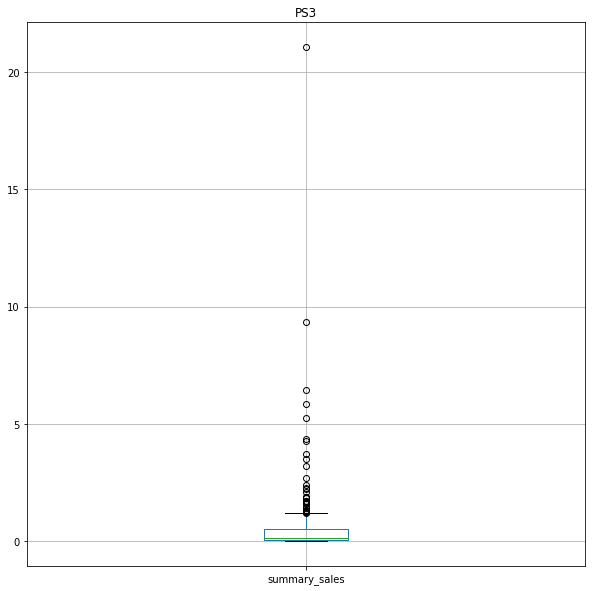

X360

       summary_sales
count     186.000000
mean        0.735484
std         1.663275
min         0.010000
25%         0.080000
50%         0.265000
75%         0.795000
max        16.270000


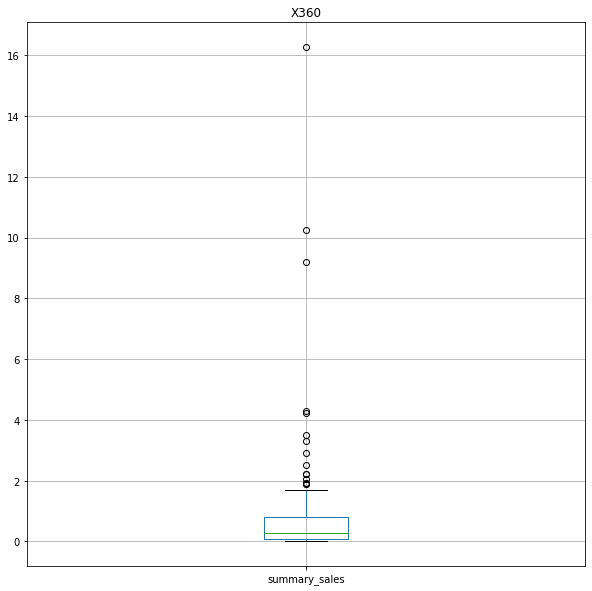

PS4

       summary_sales
count     392.000000
mean        0.801378
std         1.609456
min         0.010000
25%         0.060000
50%         0.200000
75%         0.730000
max        14.630000


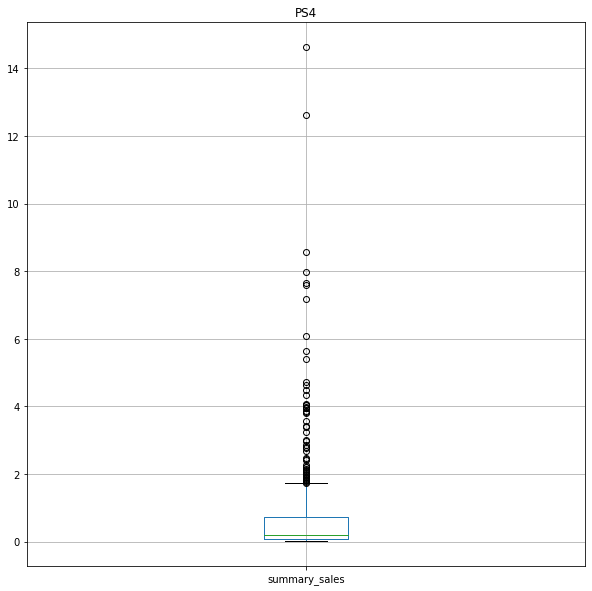

3DS

       summary_sales
count     303.000000
mean        0.472772
std         1.381347
min         0.010000
25%         0.040000
50%         0.090000
75%         0.280000
max        14.600000


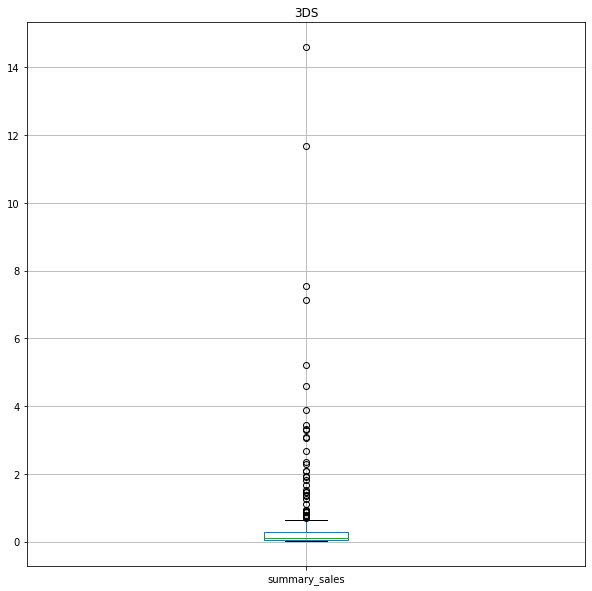

XOne

       summary_sales
count     247.000000
mean        0.645020
std         1.036139
min         0.010000
25%         0.060000
50%         0.220000
75%         0.685000
max         7.390000


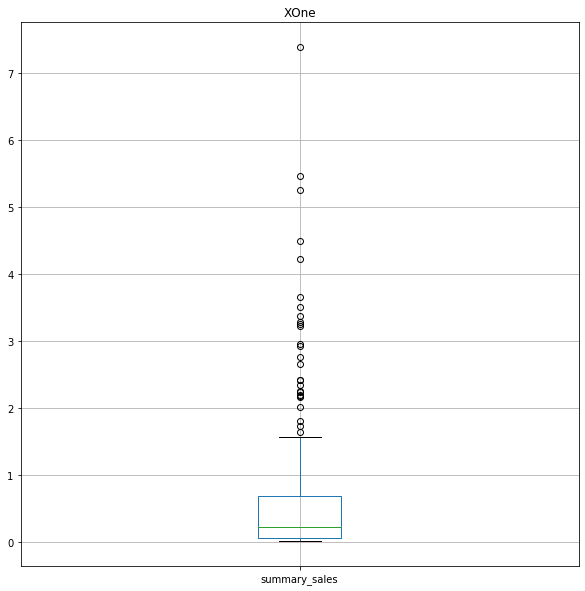

PC

       summary_sales
count     189.000000
mean        0.208624
std         0.352304
min         0.010000
25%         0.030000
50%         0.080000
75%         0.230000
max         3.050000


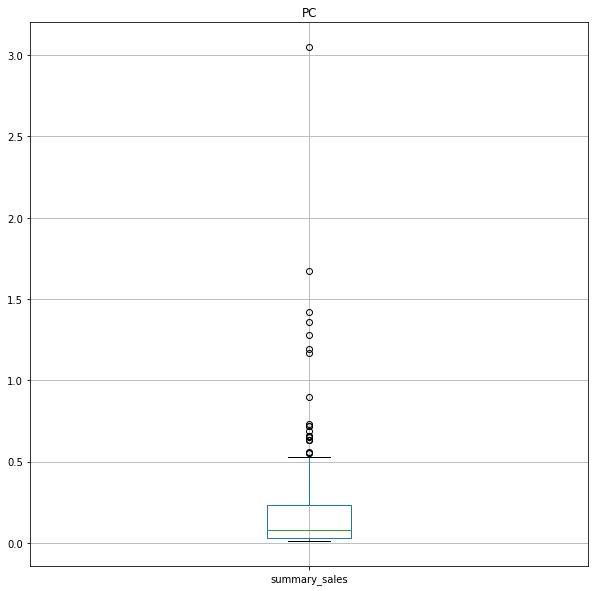

In [209]:
data_columns_2 = data_new_platform["platform"].unique()
for i in data_columns_2:
    data_one = data_new_platform[data_new_platform["platform"] == i]
    print(i)
    print()
    print(data_one[["summary_sales"]].describe())
    data_one.boxplot("summary_sales", figsize = (10,10))
    plt.title(i)
    plt.show()

# Вывод:

На PS3 есть проекты собравшие 21 млн долларов , тогда как у X360 максимальное значение 16 долларов, но у X360 больше среднее(0.73 против 0.52 млн долларов) при меньшем количестве игр(186 против 345). На PS4 в сравнении с прошлым поколением больше среднее(0.8 против 0.52 млн долларов), тогда как у XOne напротив, по сравнению с прошлым поколением среднее меньше(0.64 против 0.73 млн долларов), 3DS проигрывает старому и новому поколению PS и XBOX(среднее 0.47 млн долларов), а пк в свою очередь проигрывает 3DS(среднее 0.2 млн долларов).

# Создадим выборку актулаьного для нас периода

In [210]:
print(data["platform"].value_counts())
data_new = data.query('year_of_release > 2012')
data_new_platform = data.query('platform == ["PS4","XOne","PS3","X360","3DS","PC"] and year_of_release > 2012')
display(data_new_platform)
display(data_new)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


# Вывод:

Для того чтобы сделать прогноз 2017 год нам нужно взять актуальные данные по актуальному периоду с актуальными платформами.

Исходя из предыдущих графиков можно сказать что актуальным периодом будет выборка с 2013 года т.к все актуальные поколения имеющие значимость присутствуют в этом отрезке. Раньше брать не имеет смысла потому что результаты будут искажены значениям предыдущих поколений, а как мы выяснили из распределения продаж по годам, выручка игровых платформ с каждым годом падает.

Актуальными платформами будем считать невероятно успешные PS3 И X360, новое поколение игровых консолей(PS4, XOne, 3DS), а также PC, так как эта платформа хоть и имеет небольшие продажи, но достаточно стабильна.

# Посмотрим как отзывы влияют на продажи, на примере PS4

In [211]:
data_ps4 = data_new_platform.query('platform == "PS4"')

markercolor = data_ps4["user_score"]

fig3 = go.Scatter3d(x=data_ps4["critic_score"],
                    y= data_ps4["summary_sales"],
                    z = data_ps4["user_score"],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=10),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="critic_score"),
                                yaxis=dict( title="summary_sales"),
                                zaxis=dict( title="user_score")))

#Plot and save html
iplot({"data": [fig3],
    "layout": mylayout})

#fig0_anim = px.scatter(data_ps4.sort_values("year_of_release",ascending = True), animation_frame = "year_of_release", animation_group = "genre", x = "critic_score", y = "summary_sales", color = "genre", size = "user_score")
#fig0_anim.show()

In [212]:
data_ps4 = data_ps4.dropna()
fig0 = px.scatter(data_ps4, x = "critic_score", y = "summary_sales", color = "genre", size = "user_score", title = "Зависимость продаж на PS4 от отзывов критиков и игроков")
fig0.show()

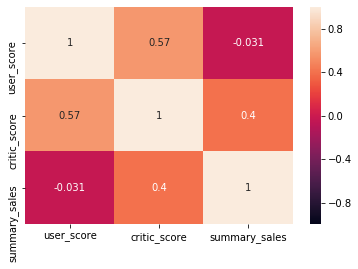

In [213]:
fig_score = px.scatter(data_ps4,x = "critic_score", y = "user_score", title = "Зависимость оценки критиков от оценки игроков")
fig_score.show()
fig_score_critic = px.scatter(data_ps4, x = "critic_score", y = "summary_sales", title = "Зависимость оценки критиков от суммарных продаж")
fig_score_critic.show()
fig_score_user = px.scatter(data_ps4, x = "user_score", y = "summary_sales", title = "Зависимость оценок игроков от суммарных продаж")
fig_score_user.show()

#Посмотрим на корреляцию пользовательских оценок, оценок критиков и суммарные продажи
fig_score_corr = data_new_platform[["user_score","critic_score","summary_sales"]]
fig_score_corr_ps4 = data_ps4[["user_score","critic_score","summary_sales"]]
sns.heatmap(fig_score_corr_ps4.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

# Вывод:

Как видно из графиков и тепловой карты корреляции никакой связи между продажами и отзывами критиков на PS4 нет или она очень слабая, такая же ситуация с отзывами игроков, если судить по тепловой карте, то связи вообще нет, но посмотрев на графики можно предположить что чем выше отзывы игроков тем меньше продажи. Также игроки и критики не всегда сходятся во мнении, игрокам в большинстве своем нравятся игры с малыми продажами, им они ставят наибольшие оценки.

# Соотнесем полученные результаты с результатами на других платформах

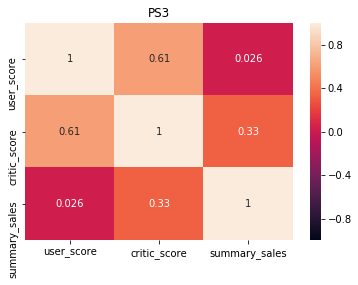

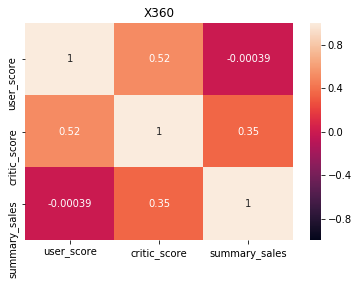

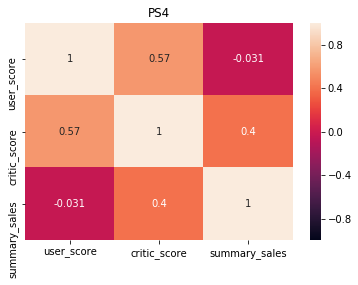

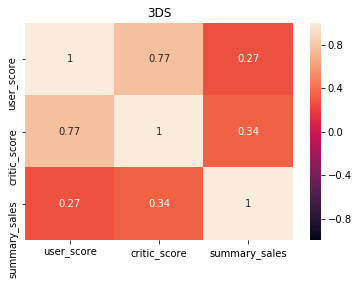

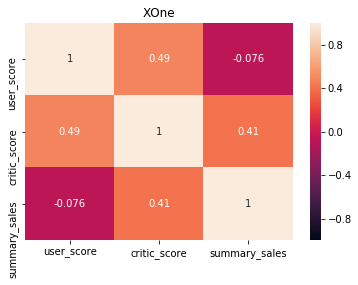

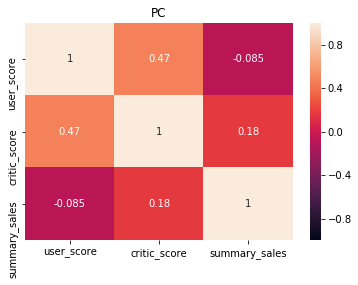

In [214]:
data_column_unique = data_new_platform["platform"].unique()
for i in data_column_unique:
    data_platform = data_new_platform[data_new_platform["platform"] == i]
    data_platform = data_platform.dropna()
    sns.heatmap(data_platform[["user_score","critic_score","summary_sales"]].corr(), vmin = -1, vmax = 1, annot = True)
    plt.title(i)
    plt.show()
    fig0 = px.scatter(data_platform, x = "critic_score", y = "summary_sales", color = "genre", size = "user_score", labels = {"critic_score": "оценка критиков " + i})
    fig0.show()



# Вывод:

Как и на PS4, на других платформах нет значительной взаимосвязи между оценками и продажами, единственное, что на 3DS игроки практически всегда согласны с мнением критиков.А на пк вообще никому дела нет до отзывов.

# Посмотрим на распределение продаж по жанрам

In [215]:
data_genre_unique = data_new_platform.groupby(["platform","year_of_release","genre"], as_index = False).sum()
display(data_genre_unique)
data_genre_unique = data_genre_unique.query('summary_sales > 1')
data_genre_grouped = data_genre_unique.groupby("genre")["summary_sales"].sum()
data_genre_uniques = data_genre_unique["genre"].unique()
data_genre_count = data["genre"].value_counts()
#print(data_genre_count)
data = data.dropna()
data_genre = data["genre"].unique()

data_genre_count = data_new_platform.groupby("genre")["platform"].count()

#Создадим словарь из ключей с названиями жанра и значением их количества
data_to_genre = {}
for i in data_genre:
    data_to = data[data["genre"] == i]["genre"].count()
    data_to_genre[i] = data_to
#print(data_to_genre)

data_to_genre_series = pd.Series(data_to_genre)
#print(data_to_genre_series)

#Построим бары для каждого жанра
figures = go.Figure()
for i in list(data_to_genre_series.index.unique()):
    data_one = data_to_genre_series[data_to_genre_series.index == i]
    figures.add_trace(go.Bar(x = data_one.index, y = data_one, name = i))
figures.show()

#Посмотрим на общую долю жанров среди всех платформ
fig3 = go.Figure(data = [go.Pie(values = data_genre_count, labels = data_genre_count.index, textinfo = "label + percent")])
fig3.update_layout(title = "Общая доля жанров среди всех платформ")
fig3.show()

,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,summary_sales
0,3DS,2013.0,Action,4.23,3.24,3.84,0.67,519.0,70.7,11.98
1,3DS,2013.0,Adventure,0.35,0.32,1.03,0.06,136.0,11.1,1.76
2,3DS,2013.0,Fighting,0.00,0.00,0.11,0.00,0.0,0.0,0.11
3,3DS,2013.0,Misc,0.63,0.74,1.76,0.12,57.0,6.3,3.25
4,3DS,2013.0,Platform,1.92,1.96,0.58,0.35,201.0,20.6,4.81
...,...,...,...,...,...,...,...,...,...,...
226,XOne,2016.0,Role-Playing,0.77,0.43,0.00,0.12,238.0,23.2,1.32
227,XOne,2016.0,Shooter,6.91,3.74,0.00,1.04,924.0,72.0,11.69
228,XOne,2016.0,Simulation,0.04,0.08,0.00,0.01,118.0,6.3,0.13
229,XOne,2016.0,Sports,3.05,2.61,0.00,0.53,652.0,61.2,6.19


# Вывод:

Самыми популярными жанрами оказались Action, RP, Sports, Shooter, Adventure. Теперь посмотрим на их распределение по платформам.

In [216]:
fig_genres = px.bar(data.query('summary_sales > 10'),x = "year_of_release", y = "summary_sales", color = "genre", title = "попурляность жанров по годам", barmode = "overlay")
fig_genres.show()

fig_genres_platform = px.bar(data.query('summary_sales > 5'), x = "genre", y = "summary_sales", color = "platform", labels = {"genre" : "график прибыльности жанров"}, color_discrete_sequence=px.colors.sequential.RdBu, barmode = "overlay")
fig_genres_platform.show()

fig_platform_genres = px.bar(data.query('summary_sales > 5'), x = "platform", y = "summary_sales", color = "genre", labels = {"platform": "популярность жанров на разных платформах"})
fig_platform_genres.show()

# Вывод:

Популярные жанры по годам постоянно менялись, с 1998 по 2004 были популярны Racing и Action, в 2006 случился бум популярности жанра спортивных игр и инди игр и к 2012 году безоговорчное лидерство закрепили за собой жанры Action и Shooter.

Однако самыми прибыльными жанрами оказались Sports,Racing,Misc и Platform, 

    Для жанра Sports самыми популярными платформами оказались PS3(6.46 млн проданных копий), PS4(6.08), X360(6.19), Wii(82.54) и PS(5.02), 
    
    Для жанра Racing GBA(5.48), 3DS(12.65), PS2(14.97) и Wii(28.91), 
    
    Для жанра Misc PS2(5.12), DS(20,14), X360(21.82),Wii(28.91),
    
    Для жанра Platform WiiU(5.23),PS3(5.82), GС(6.31), PS(7.13), 3DS(9.9), Wii(28.32), DS(29.8).
    

Для самых прибыльных платформ Wii, PS3, X360, PS, DS, PS2 самыми прибыльными жанрами оказались:

    Для Wii: Sports, Racing, Platform
    
    Для PS3: Action, Shooter, Racing
    
    Для X360: Shooter, Action, Misc
    
    Для PS: Action, Racing, RP
    
    Для DS: Racing, Platform, Misc, Puzzle
    
    Для PS2: Action, Racing, RP

In [217]:
dataa = []
for i in data_genre_uniques:
    data_genre = data_genre_unique[data_genre_unique["genre"] == i]
    data_genre = data_genre.groupby("genre")["summary_sales"].sum()
    dataa.append(go.Bar(x = data_genre.index ,y = data_genre ,name = i))
    
fig_genre = go.Figure(data = dataa)
fig_genre.update_layout(barmode='overlay',xaxis = {"title": "популярные графики из топа платформ"})
fig_genre.show()

# Составим портрет пользователя для 3 регионов(na,eu,jp)

## Найдем топ 5 жанров для каждого региона

In [218]:
#na_user = data_new_platform.groupby("genre")["na_sales"].sum()
#eu_user = data_new_platform.groupby("genre")["eu_sales"].sum()
#jp_sales = data_new_platform.groupby("genre")["jp_sales"].sum()
data_new_unique = data_new_platform["genre"].unique()

for i in ["na_sales", "eu_sales", "jp_sales"]:
    group_data = data_new_platform.groupby(["genre",i], as_index = False).sum()
    print(group_data.groupby("genre")["genre"].count().sort_values(ascending = False))
    fig_hist = px.histogram(group_data, x = "genre", labels = {"genre" : "распределение в регионе " + i + " в разбивке по жанрам"}) 
    fig_hist.show()

genre
Action          94
Shooter         89
Sports          75
Role-Playing    56
Misc            34
Fighting        30
Platform        28
Racing          27
Adventure       23
Simulation      16
Strategy        14
Puzzle           3
Name: genre, dtype: int64


genre
Action          85
Shooter         82
Sports          56
Role-Playing    51
Racing          39
Platform        25
Misc            25
Simulation      24
Fighting        24
Adventure       24
Strategy        16
Puzzle           6
Name: genre, dtype: int64


genre
Role-Playing    47
Action          43
Misc            22
Shooter         21
Fighting        20
Sports          19
Adventure       15
Simulation      12
Platform        12
Strategy        11
Racing           6
Puzzle           6
Name: genre, dtype: int64


In [219]:
fig = go.Figure()
for i in ["na_sales","eu_sales","jp_sales"]:
    country_user = data_new_platform.groupby("genre")[i].sum()
    country_user = country_user.dropna()
    for genre in data_new_unique:
        country_user_genre = country_user[country_user.index == genre]
        fig.add_trace(go.Bar(x = country_user_genre.index, y = country_user_genre, name = i))
fig.update_layout(barmode = "overlay")
fig.show()

# Вывод:

Топ 5 популярных жанров для Северной Америки: Action, Shooter, Sports, RP, Misc.

Топ 5 популярных жанров для Европы: Action, Shooter, Sports, RP, Racing.

Топ 5 популярных жанров для Японии: RP, Action, Misc, Shooter, Fighting.

Американцы и Европейцы в большинстве своём схожи в выборе жанров, тогда как Японцы заметно отличаются в этом плане.

## Посмотрим на распределение рейтингов для каждого региона

In [220]:
for i in ["na_sales", "eu_sales", "jp_sales"]:
    group_data = data_new_platform.groupby(["rating",i], as_index = False).sum()
    fig_hist = px.histogram(group_data, x = "rating", labels = {"rating" : "распределение в регионе " + i + " в  разбивке по рейтингу"}) 
    fig_hist.show() 

In [221]:
fig_rating = go.Figure()
for i in ["na_sales","eu_sales","jp_sales"]:
    country_rating = data_new_platform.groupby("rating")[i].sum()
    country_rating = country_rating.dropna()
    for rating in list(data_new_platform["rating"].unique()):
        country_rating_one = country_rating[country_rating.index == rating]
        fig_rating.add_trace(go.Bar(x = country_rating_one.index, y = country_rating_one, name = i))
fig_rating.update_layout(barmode = "overlay")
fig_rating.show()

# Вывод:

Для Северной Америки распределение таково:
    
    1 место: рейтинг M
    
    2 место: рейтинг E
    
    3 место: рейтинг E10+ и T
    
    
Для Европы:

    1 место: рейтинг M
    
    2 место: рейтинг E
    
    3 место: рейтинг T
    
    4 место: рейтинг E10+
    
   
Для Японии:

    1 место: рейтинг M
    
    2 место: рейтинг T
    
    3 место: рейтинг E
    
    4 место: рейтинг E10+
    

Здесь также у Американцев и Европейцев схожее распределение, тогда как в Японии больше игр с рейтингом "для подростков".

## Найдем топ 5 плафторм для каждого региона

In [222]:
for i in ["na_sales", "eu_sales", "jp_sales"]:
    group_data = data_new_platform.groupby(["platform",i], as_index = False).sum()
    fig_hist = px.histogram(group_data, x = "platform", labels = {"platform" : "распределение в регионе " + i + " в разбивке по платформам"})
    fig_hist.show()
fig = go.Figure()

# Вывод:

Топ 5 для Северной Америки: PS4, XOne, X360, PS3, 3DS


Топ 5 для Европы: PS4, PS3, XOne, X360, PC


Топ 5 для Японии: 3DS, PS3, PS4, X360, XOne


Закономерные результаты для каждого региона, успех PS4 в Северной Америке и Европе обусловлен общемировой популярностью консоли, XBOX для Северной Америки обусловлен тем, что для XBOX этот регион является приоритетным там XBOX имеет наибольший успех, поэтому XOne там продается лучше, чем в Европе, из-за ошеломительного успеха X360 в своё время. В Европе в топ 5 входит PC, а в Японии лидирует 3DS одна из самых успешных консолей за всю историю, к тому же на ней выходит масса нишевых эксклюзивов в которые играет, наверное, вся Япония. 2 и 3 место занимают консоли Sony, по той же причине, что и 3DS, они Японские. 

## Посмотрим на статистику выручки по платформам 

In [226]:
dataa = []

for i in ["summary_sales","na_sales","eu_sales","jp_sales"]:
    data_mean = data.groupby("year_of_release", as_index = False).agg({"genre": "count",
                                                                       i : "mean",
                                                                       "platform" : "count",
                                                                       "rating" : "count"})
    
    dataa.append(go.Scatter(x = data_mean["year_of_release"], y = data_mean[i], name = i))
fig = go.Figure(data = dataa)
fig.show()

fig1 = px.bar(data_new_platform, x = "rating", y = "summary_sales", barmode = "overlay")
fig1.show()

# Вывод:

Долгое время Северная Америка лидировала по выручке, Европа была на 2 месте, а Япония на 3, но в 2016 Европа перехватила лидерство и теперь у неё больше всего выручки среди регионов.

# Проверка гипотез

# Средний пользовательский рейтинг Xone и PC одинаковый

    Нулевая гипотеза: Средний пользовательский рейтинг Xone и PC одинаковый
    
    
    Альтернативная гипотеза: Средний пользовательский рейтинг Xone и PC различается

In [224]:
data_xbox = data_new_platform[(data_new_platform["platform"] == "XOne") & (data_new_platform["user_score"] > 0)]["user_score"]
data_pc = data_new_platform[(data_new_platform["platform"] == "PC") & (data_new_platform["user_score"] > 0)]["user_score"]

alpha = .05

result = st.ttest_ind(data_xbox,data_pc)

print(result.pvalue)
print("XOne: ", data_xbox.mean())
print("PC: ", data_pc.mean())

if result.pvalue < alpha:
    print("Нулевая гипотеза отвергнута")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.14012658403611647
XOne:  6.521428571428572
PC:  6.2696774193548395
Не получилось отвергнуть нулевую гипотезу


**Такие результаты обусловлены тем, что Microsoft с XOne, в отличие от Sony с PS4 не придерживается политики эксклюзивности игр на своей платформе и в том числе выпускает их на пк.** 

# Средний пользовательский рейтинг жанров Action и Sports различается

        Нулевая гипотеза: Средний пользовательский рейтинг жанров Action и Sports одинаковый
        
        
        Альтернативная гипотеза: Средний пользовательский рейтинг жанров Action и Sports различается

In [225]:
data_action = data_new_platform[(data_new_platform["genre"] == "Action") & (data_new_platform["user_score"] > 0)]["user_score"]
data_sport = data_new_platform[(data_new_platform["genre"] == "Sports") & (data_new_platform["user_score"] > 0)]["user_score"]

alpha = .05

result = st.ttest_ind(data_action,data_sport)

print(result.pvalue)
print("Action: ", data_action.mean())
print("Sports: ", data_sport.mean())

if result.pvalue < alpha:
    print("Нулевая гипотеза отвергнута")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.329368959283221e-23
Action:  6.767080745341615
Sports:  5.22972972972973
Нулевая гипотеза отвергнута


# Общий вывод:

1. Самыми популярными платформами за последнии 30 лет были DS, PS, PS2, PS3, X360, 3DS, PS4.

2. Самыми популярными платформами с 2014 года стали 3DS, XOne, PS4.

3. С 2008 года выручка в игровой индустрии постоянно падает, но есть шанс на возрождения после того как новое поколение наберет обороты.

4. В среднем продолжительность "жизни" платформы равна 4 годам.

5. Самые популярные жанры игр: Action, RP, Sports, Shooter, Misc, Fighting.

6. К 2016 году Европа по выручке обогнала Северную Америку и занимает 1 место по выручке в игровой индустрии, 2 место за Северной Америкой, 3 место у Японии.

7. Средний пользовательский рейтинг XOne и PC одинаковый(6,52 и 6,3 соотвественно)

8. Средний пользовательский рейтинг жанров Action и Sports различается(6.8 и 5.2 соответсвенно)


Рекомендации для игровой компании:

    1. Ориентироваться на PS4, т.к эта платформа составляет 47% рынка и имеет бОльшую часть выручки.
    
    2. На популярность игры имеет влияние жанр,самые популярные жанры:Action, RP, Shooter или Sports.
    
    3. Ориентироваться на западный рынок.
    
    4. Смотреть игры с рейтингом M - их больше всего и они лучше всего продаются.